In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
dataset = load_digits()
data = dataset.images.reshape((len(dataset.images), -1))
X, y = data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

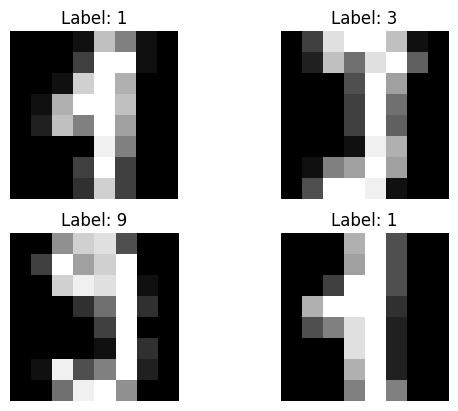

In [3]:
for i in range(0, 4):
    plt.subplot(2, 2, i+1)
    plt.title(f"Label: {y[i+90]}")
    plt.axis("off")
    plt.imshow(dataset.images[i+90], cmap="gray")
plt.show()

In [4]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier()
clf.fit(X_train, y_train)

RidgeClassifier()

In [5]:
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred)
cv_score = np.mean(cross_val_score(clf, X_test, y_test))

print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       0.94      0.97      0.96        35
           2       0.97      0.97      0.97        39
           3       0.94      0.86      0.90        37
           4       1.00      0.86      0.92        42
           5       0.89      0.97      0.93        34
           6       1.00      1.00      1.00        41
           7       0.94      0.97      0.95        31
           8       0.92      0.92      0.92        24
           9       0.83      0.89      0.86        38

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



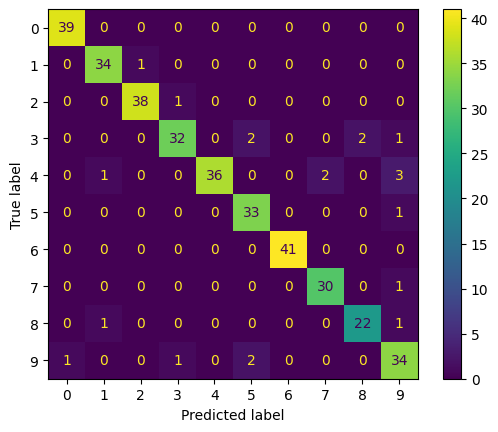

In [6]:
confmat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confmat, display_labels=dataset.target_names).plot()